In [1]:
!pip install xgboost
! pip install gplearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import csv
import re
from matplotlib import pyplot as plt

from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [17]:
dataset = pd.read_csv('/content/dockerImaesDataset.csv')
dataset.columns.values

array(['docker image', 'Tag ', 'Created on ', 'Size', 'package manager ',
       'base image', '# alternative base imgs ', '# tested dependences ',
       '# valnarble dependeces  ', 'critical', 'high  ', 'medium ',
       'low ', '# of downloads', 'secure'], dtype=object)

In [4]:
dataset.describe()

Created on   # alternative base imgs   # tested dependences   \
count   305.000000                313.000000             313.000000   
mean    356.078490                  0.488818             158.881789   
std     616.765117                  1.059467             167.546383   
min       0.041667                  0.000000               0.000000   
25%       2.000000                  0.000000              54.000000   
50%      14.000000                  0.000000             112.000000   
75%     365.300000                  1.000000             169.000000   
max    3285.000000                  6.000000            1016.000000   

       # valnarble dependeces      critical      high        medium   \
count                313.000000  313.000000  313.000000   312.000000   
mean                  98.204473    2.201278    8.102236    32.278846   
std                  224.783278    7.281941   23.488044   107.798650   
min                    0.000000    0.000000    0.000000     0.000000   
25%                    0.000000    0.000000    0.000000     0.000000   
50%                   21.000000    0.000000    0.000000     0.500000   
75%                   64.000000    1.000000    4.000000    11.000000   
max                 2450.000000   79.000000  193.000000  1190.000000   

              low   # of downloads      secure  
count   313.000000    3.130000e+02  313.000000  
mean     53.226837    1.075449e+10    0.536741  
std     106.442245    3.068917e+10    0.499447  
min       0.000000    0.000000e+00    0.000000  
25%       0.000000    1.000000e+07    0.000000  
50%       9.000000    1.000000e+08    1.000000  
75%      52.000000    5.000000e+08    1.000000  
max    1064.000000    1.000000e+11    1.000000

In [18]:
# Convert the column to string format
dataset['Size'] = dataset['Size'].astype(str)

# Step 1: Parse the string
def extract_value(x):
    m = re.match(r'(\d+)([KMG]B)', x)
    if m:
        value = int(m.group(1))
        unit = m.group(2)
        return value, unit
    else:
        return None, None

dataset['Size'] = dataset['Size'].apply(lambda x: extract_value(x))

# Step 2: Convert to bytes
def convert_to_bytes(x):
    if x[0] is not None and x[1] is not None:
        if x[1] == 'KB':
            return x[0] * 1024
        elif x[1] == 'MB':
            return x[0] * 1024 * 1024
        elif x[1] == 'GB':
            return x[0] * 1024 * 1024 * 1024
        elif x[1] == 'B':
            return x[0] * 1024 
    else:
        return None

dataset['Size'] = dataset['Size'].apply(lambda x: convert_to_bytes(x))

# Step 3: Normalize the values
max_value = dataset['Size'].max()
dataset['Size'] = dataset['Size'] / max_value

# Step 4: Scale the values
dataset['Size'] = dataset['Size'] * 10

# Perform label encoding on the 'category' column
le = LabelEncoder()

dataset['package manager '] = dataset['package manager '].astype(str)
dataset['package manager '] = le.fit_transform(dataset['package manager '])

dataset['base image'] = dataset['base image'].str.split(':', expand=True)[0]
dataset['base image'] = le.fit_transform(dataset['base image'])

dataset['Tag '] = dataset['Tag '].astype(str)
dataset['Tag '] = le.fit_transform(dataset['Tag '])

dataset['secure'] = le.fit_transform(dataset['secure'])

dataset['# of downloads'].astype('float')
dataset['# of downloads'] = dataset['# of downloads'] / dataset['# of downloads'].max()



In [20]:
df = dataset.dropna()

X = df.drop(columns=['secure'], axis = 1)
y = df['secure']
X = X.drop(columns= ['docker image'], axis = 1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

# NN model does not fit in this task

In [94]:

from sklearn.metrics import accuracy_score
from tensorflow import keras

# define the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# compile the model
model.compile(loss='mse', optimizer='adam')

# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=600, batch_size=64)

# evaluate the model on the test set
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')


# calculate the accuracy

y_pred = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Epoch 1/600
1/1 [==============================] - 1s 812ms/step - loss: 291.9673 - val_loss: 252.7148
Epoch 2/600
1/1 [==============================] - 0s 36ms/step - loss: 165.0383 - val_loss: 186.4239
Epoch 3/600
1/1 [==============================] - 0s 35ms/step - loss: 131.0721 - val_loss: 175.5133
Epoch 4/600
1/1 [==============================] - 0s 45ms/step - loss: 127.5337 - val_loss: 157.1189
Epoch 5/600
1/1 [==============================] - 0s 39ms/step - loss: 110.2937 - val_loss: 125.3346
Epoch 6/600
1/1 [==============================] - 0s 35ms/step - loss: 83.8403 - val_loss: 93.8731
Epoch 7/600
1/1 [==============================] - 0s 33ms/step - loss: 65.0029 - val_loss: 72.4335
Epoch 8/600
1/1 [==============================] - 0s 35ms/step - loss: 61.7460 - val_loss: 61.0531
Epoch 9/600
1/1 [==============================] - 0s 39ms/step - loss: 68.9581 - val_loss: 53.3020
Epoch 10/600
1/1 [==============================] - 0s 34ms/step - loss: 75.0294 - val_lo

In [ ]:
# evaluate the model on the test set
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')


RMSE: 0.27
R-squared: 0.69


# Supervised Learning 

# RandomForestClassifier

In [8]:
SEED = 42
rfc = RandomForestClassifier(n_estimators=3, max_depth=2, random_state=SEED)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14



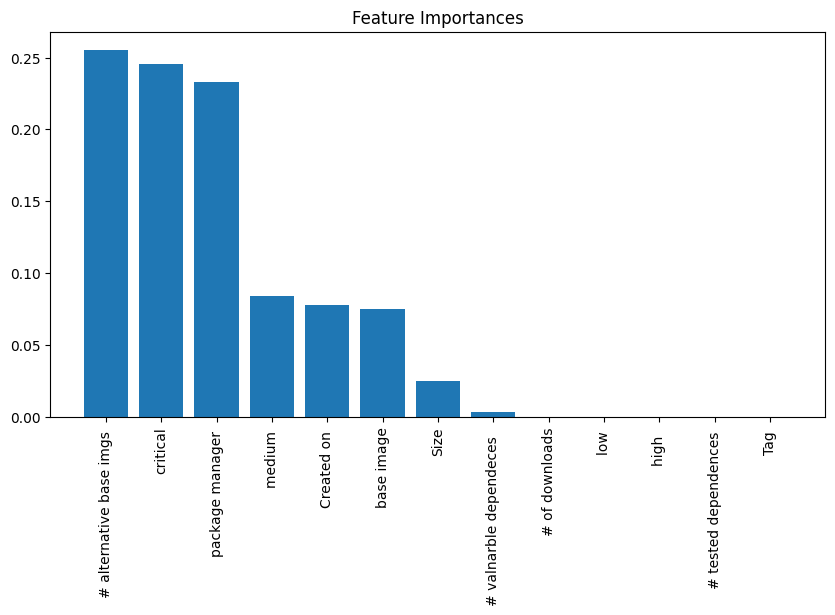

In [123]:
importances = rfc.feature_importances_

indices = np.argsort(importances)[::-1]

# Get the names of the features
features = X.columns.values

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [22]:
df = df.drop(columns=["# of downloads", "low ", "high  ", "Tag ", "# tested dependences " , "Size", "# valnarble dependeces  ", "docker image"], axis=1)
df = df.dropna()

In [23]:
X = df.drop(columns=['secure'], axis = 1)
y = df['secure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [40]:
SEED = 42
rfc = RandomForestClassifier(n_estimators=3, max_depth=2, random_state=SEED)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14



# DecisionTreeClassifier

In [41]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=12)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate the classification metrics with average='weighted'
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.93
Precision: 0.90
Recall: 1.00
F1 Score: 0.95


In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

# Create a gradient boosting classifier with 100 trees
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
gbc.fit(X_train, y_train)

# Evaluate the model on the testing set
score = gbc.score(X_test, y_test)
print("Gradient Boosting Accuracy:", score)


Gradient Boosting Accuracy: 0.9230769230769231


In [95]:
! pip install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define the XGBoost model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict the classes of the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.88


# Gradient Boosting Classifier

In [53]:
model = xgb.XGBClassifier()

# train the model
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calculate the error rate
cm = confusion_matrix(y_test, y_pred)
error_rate = 1 - cm.diagonal().sum() / cm.sum()
print("Error rate:", error_rate)


Accuracy: 0.8846153846153846
Error rate: 0.11538461538461542


# GaussianProcessRegressor

In [76]:
kernel = RBF()

# build the GPR model
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# fit the model on training data
gpr.fit(X_train, y_train)

# predict on test data
y_pred = gpr.predict(X_test)

# calculate RMSE and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.22537470949079605
RMSE: 0.3673257688973643
R-squared: 0.46028711801584044


# SymbolicRegressor

In [ ]:
# Define the search space and other parameters
function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'inv', 'max', 'min']
est_gp = SymbolicRegressor(population_size=5000, generations=20, tournament_size=20,
                            function_set=function_set, metric='mean absolute error',
                            verbose=1, random_state=0)

# Fit the model to the training data
est_gp.fit(X_train, y_train)

# Compute the R-squared value on the testing data
y_pred = est_gp.predict(X_test)
y_bar = y_test.mean()
TSS = ((y_test - y_bar) ** 2).sum()
RSS = ((y_pred - y_test) ** 2).sum()
r2 = 1 - RSS/TSS
print("R-squared: ", r2)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.34      1.34783e+06        6        0.0706711              N/A      1.08m
   1     9.68          85.7818        6        0.0706711              N/A     55.02s
   2    12.06          89.2657       11        0.0520528              N/A     57.97s
   3    10.42          20.2649       12        0.0467852              N/A      1.60m
   4     9.61          23.9017       15        0.0253288              N/A      2.09m
   5    10.02           2.3375       33         0.023819              N/A      2.66m
   6    10.12           3.6578       23        0.0238136              N/A      1.70m
   7    13.35          1.37102       30        0.0238098              N/A     54.31s
   8    12.30          1.65082       26        0.0238107              N/A  

In [54]:
# Import the necessary libraries
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Naive Bayes classifier object
nb = GaussianNB()

# Train the classifier using the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)


Accuracy: 0.9615384615384616


In [55]:
# Import the necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier object
svm = SVC(kernel='linear')

# Train the SVM classifier using the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)


Accuracy: 0.9230769230769231


In [56]:
# Import the necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a logistic regression classifier object
lr = LogisticRegression()

# Train the logistic regression classifier using the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)


Accuracy: 0.9615384615384616


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# UNSUPERVISED LEARNING 

# GaussianMixture

In [57]:
# create a Gaussian Mixture Model with two components
gmm = GaussianMixture(n_components=5)

# fit the model to the data
gmm.fit(X)

# predict the labels of the data
labels = gmm.predict(X)

# calculate the accuracy of the model
accuracy = accuracy_score(y, labels)
# calculate the error rate of the model
error_rate = 1 - accuracy

print("Accuracy: ", accuracy)
print("Error rate: ", error_rate)


Accuracy:  0.32142857142857145
Error rate:  0.6785714285714286


# KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(X, kmeans.labels_)

print("The average silhouette score is:", silhouette_avg)



The average silhouette score is: 0.7120400480743291


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# kNN

In [59]:
# Choose the value of K
k = 5

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6538461538461539
